# Behavioral Research: Does sugar and fat change the feeding behavior of animals?

This Jupyter notebook plot time charts to visualize each experimental group's **average** feeding activities overtime.

## Import Libraries and Excel Sheets

In [1]:
#----------------------------------------------------------
# Import important libraries
#----------------------------------------------------------
import pandas as pd
import numpy as np
import datetime
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import matplotlib.gridspec as gridspec

#----------------------------------------------------------
# Set Fonts and Background for the Figures
#----------------------------------------------------------
sns.set()
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': 'black', 'font.family': 'Arial'})
#plt.rcParams['hatch.linewidth'] = 3
plt.rcParams['figure.dpi'] = 1000

## Read CSV Files with Binary Data Back In

In [2]:
# Links to all CSV files
hfhs_adlib_feeding_location = "https://www.dropbox.com/s/hvz5lziuutmk45v/Feeding_HFHS_AdLib_Binary.csv?dl=1"
cont_adlib_feeding_location = "https://www.dropbox.com/s/4ref8epzejqccvv/Feeding_Control_AdLib_Binary.csv?dl=1"
hfhs_restr_feeding_location = "https://www.dropbox.com/s/n5tux2lq630x747/Feeding_HFHS_Restricted_Binary.csv?dl=1"
cont_restr_feeding_location = "https://www.dropbox.com/s/2ihaa7zfh8uwi1s/Feeding_Control_Restricted_Binary.csv?dl=1"

normalized_feeding_location = "https://www.dropbox.com/s/klfr764ndrc76er/Feeding_Normalized_Activity.csv?dl=1"

# Feeding
hfhs_adlib_feeding = pd.read_csv(hfhs_adlib_feeding_location, index_col='Date_Time', parse_dates=True)
cont_adlib_feeding = pd.read_csv(cont_adlib_feeding_location, index_col='Date_Time', parse_dates=True)
hfhs_restr_feeding = pd.read_csv(hfhs_restr_feeding_location, index_col='Date_Time', parse_dates=True)
cont_restr_feeding = pd.read_csv(cont_restr_feeding_location, index_col='Date_Time', parse_dates=True)


# Normalized Activity Dataframes
normalized_feeding = pd.read_csv(normalized_feeding_location, index_col='Date_Time', parse_dates=True)




hfhs_adlib_feeding.head()

,Rat21,Rat22,Rat23,Rat26,Rat27
Date_Time,,,,,
1970-01-01 21:00:00,0,0,0,0,0.0
1970-01-01 21:00:01,0,0,0,0,0.0
1970-01-01 21:00:02,0,0,0,0,0.0
1970-01-01 21:00:03,0,0,0,0,0.0
1970-01-01 21:00:04,0,0,0,0,0.0


## Download parmeters for plotting each group

In [3]:
#----------------------------------------------------------
# Import plotting parameters
#----------------------------------------------------------
plot_data_location = "https://www.dropbox.com/s/djpbvky0mwxpups/plotting_by_group.csv?dl=1"
plot_parameters = pd.read_csv(plot_data_location, index_col=0)
plot_parameters

,color,marker,line_type,hatches,hatch_colors,fill_color,label
group,,,,,,,
control ad lib,grey,o,-,,grey,grey,CA
control restriction,grey,v,--,/,grey,white,CR
HFHS ad lib,red,o,-,,red,red,HA
HFHS restriction,red,v,--,/,red,white,HR


## Download Hourly Feeding Activity

In [4]:
# Read in CSV file with hourly data
feeding_hourly_location = "https://www.dropbox.com/s/0p2qhfjh0ut3fug/food_total_by_hour.csv?dl=1"
feeding_hourly_data = pd.read_csv(feeding_hourly_location, index_col = 0).T

metafile = feeding_hourly_data.iloc[-1].T
feeding_hourly_data.drop(feeding_hourly_data.tail(1).index,inplace=True) 
feeding_hourly_data

,2,3,4,5,6,7,8,9,10,11,...,23,26,27,29,30,31,32,33,35,36
21:00,0,385,701,461,0,435,717,272,0,0,...,46,27,130,0,0,0,0,0,0,0
22:00,501,584,70,381,650,1114,593,813,0,0,...,1318,0,641,0,0,0,0,0,0,0
23:00,1090,91,212,600,1062,495,0,532,345,72,...,62,0,60,488,103,176,188,210,1096,1163
0:00,0,265,0,53,398,1065,404,202,1075,101,...,0,0,0,427,242,235,3,145,247,0
1:00,1169,419,79,0,394,76,56,0,0,0,...,98,75,31,144,406,401,280,195,0,45
2:00,25,387,648,0,314,0,757,0,40,163,...,59,388,105,110,0,191,0,200,31,0
3:00,0,326,0,0,562,0,41,464,0,78,...,15,111,0,98,102,302,0,19,82,0
4:00,82,0,0,300,0,0,124,384,42,0,...,0,18,56,170,312,85,0,6,100,168
5:00,395,0,0,76,38,634,0,9,22,23,...,165,67,2,225,21,71,20,13,49,88
6:00,1632,431,1066,274,127,825,587,0,0,65,...,0,87,308,620,426,361,349,126,957,244


# Overall Integrated Time Panel
The following function will smooth out the activity of the **normalized** rat for each diet group and graph it on a time panel

## Making average activity smooth

In [5]:
#----------------------------------------------------------
# Method to create a rolling-average plot over 15 minutes
#----------------------------------------------------------
def runing_avg(x, sampling_freq, window):
    
    # Re-sample with lower frequency; frequency of re-sampling given by parameter sampling_freq
    #y = x.resample(sampling_freq).sum()
    # Apply rolling window averaging
    z = x.rolling(window, win_type='boxcar').mean()
    #z = z.fillna(0)
    z = z.dropna()
    return(z)

## Loop through Diet and feeding conditions and plot timeline for each group

In [6]:
def plot_feeding_vs_time(hourly_dataframe, group, color):
    # Separate into subgroups according to diet and food accesibility
    hours = np.arange(0, hourly_dataframe.shape[0])
    ids = metafile[metafile == group].index
    feeding_series = hourly_dataframe[ids]
    line = plt.errorbar(hours, feeding_series.mean(axis = 1).fillna(0), yerr=feeding_series.std(axis = 1).fillna(0)/np.sqrt(feeding_series.shape[1]), color = color, marker = 'o', ls=plot_parameters.loc[group].line_type, markersize = 3, capsize=5, lw = 1)
    #plt.axvline(x=restriction_start, ymin=0, ymax=400, color='black', ls ='--')
    #artists.append(line)
    plt.xlim(0, 24)
    plt.ylim(0, 1100)
    plt.xlabel('Time (hr)', fontname = 'Arial', fontsize=10, fontweight = "bold", color = "black")
    plt.ylabel('Time Spent Feeding (sec)', fontsize=10, color = "black", fontweight = "bold")
    plt.yticks(fontname = 'Arial', fontsize=10, color = "black")
    plt.xticks([0, 6, 12, 18, 24],['21:00', '3:00', '9:00', '15:00', '21:00'], rotation=0, fontname = 'Arial', fontsize=10, color = 'black')
    
    plt.axvspan(0, 12, facecolor='black', alpha=0.15)

    # Clean up plot
    plt.tight_layout()
    

# Panel of Feeding Activity Overtime

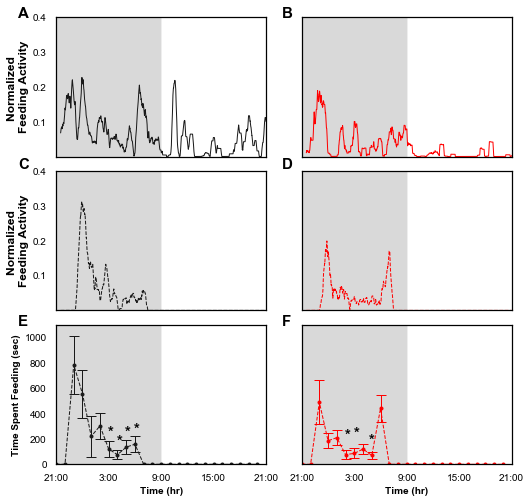

In [19]:
#----------------------------------------------------------
# Method to create a rolling-average Time Chart
#----------------------------------------------------------

def time_plot_panel_v2(diet_column, color, linestyle, ymax=0.4, ylabel = "Normalized \nFeeding Activity"):
    plt.plot(runing_avg(diet_column, "1S", 1800), color = color, linestyle = linestyle, lw = 1)
    plt.yticks(fontname = 'Arial', fontsize=10, color = 'black')
    plt.ylabel(ylabel, color = 'black', fontname = 'Arial', fontsize=12, fontweight='bold')
    plt.ylim(0, ymax)
    plt.xlim('1970-01-01 21:00:00.000', '1970-01-02 21:00:00.000')
    plt.xlabel('Time (hr)', fontname = 'Arial', fontsize=10, fontweight='bold', color = 'black')
    plt.xticks(['1970-01-01 21:00:00.000', '1970-01-02 03:00:00.000', '1970-01-02 9:00:00.000', '1970-01-02 15:00:00.000', '1970-01-02 21:00:00.000'],['21:00', '3:00', '9:00', '15:00', '21:00'], rotation=0, fontname = 'Arial', fontsize=10, color = 'black')
    plt.axvspan('1970-01-01 21:00:00.000', '1970-01-02 9:00:00.000', facecolor='black', alpha=0.15)

    # Clean up plot
    plt.tight_layout()

f = plt.figure(figsize = (7.48, 7))

# Control AdLib
plt.subplot(3, 2, 1)
time_plot_panel_v2(normalized_feeding["Control Ad Lib"], "0.1", "-")
plt.xlabel('')
plt.xticks([])

## Remove '0' from y-axis
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.figtext(0.04, 0.97, "A", fontsize = 15, color = "black", fontweight = "bold")

# HFHS AdLib
plt.subplot(3, 2, 2)
time_plot_panel_v2(normalized_feeding["HFHS Ad Lib"], "red", "-")
plt.xlabel('')
plt.xticks([])
plt.ylabel('')
plt.yticks([])
plt.figtext(0.53, 0.97, "B", fontsize = 15, color = "black", fontweight = "bold")

# Control Restricted
plt.subplot(3, 2, 3)
time_plot_panel_v2(normalized_feeding["Control Restricted"], "0.1", "--")
plt.xlabel('')
plt.xticks([])

## Remove '0' from y-axis
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.figtext(0.04, 0.67, "C", fontsize = 15, color = "black", fontweight = "bold")

# HFHS Restricted
plt.subplot(3, 2, 4)
time_plot_panel_v2(normalized_feeding["HFHS Restricted"], "red", "--")
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([])
plt.figtext(0.53, 0.67, "D", fontsize = 15, color = "black", fontweight = "bold")
plt.tight_layout()

# Control Restrited - Binge
plt.subplot(3, 2, 5)
plot_feeding_vs_time(feeding_hourly_data, "control restriction", "0.1")
plt.annotate('*', (5.9, 220), fontsize=15, color = 'black', fontweight='bold')
plt.annotate('*', (6.9, 150), fontsize=15, color = 'black', fontweight='bold')
plt.annotate('*', (7.9, 220), fontsize=15, color = 'black', fontweight='bold')
plt.annotate('*', (8.9, 240), fontsize=15, color = 'black', fontweight='bold')
plt.figtext(0.04, 0.36, "E", fontsize = 15, color = "black", fontweight = "bold")

# HFHS Restrited - Binge
plt.subplot(3, 2, 6)
plot_feeding_vs_time(feeding_hourly_data, "HFHS restriction", "red")
plt.ylabel('')
plt.yticks([])
plt.annotate('*', (4.9, 200), fontsize=15, color = 'black', fontweight='bold')
plt.annotate('*', (5.9, 210), fontsize=15, color = 'black', fontweight='bold')
plt.annotate('*', (7.7, 160), fontsize=15, color = 'black', fontweight='bold')
plt.figtext(0.53, 0.36, "F", fontsize = 15, color = "black", fontweight = "bold")

plt.tight_layout()
plt.savefig("Feeding Activity Panel.tif", dpi = 1000)
plt.show()

# Raster Plots
The following function will show the activities of **every** rat in each diet group

## Create a Panel for Feeding Activity

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


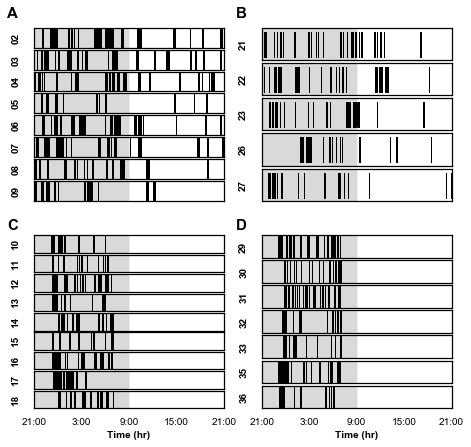

In [8]:
dietframes = [cont_adlib_feeding, hfhs_adlib_feeding, cont_restr_feeding, hfhs_restr_feeding]

#----------------------------------------------------------
# Method to create a panel for raster plots for Feeding Activity
#----------------------------------------------------------
fig = plt.figure(figsize = (7.48, 7))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

for i, group in zip(range(4), dietframes):
    inner = gridspec.GridSpecFromSubplotSpec(len(group.columns), 1,
                    subplot_spec=outer[i], wspace=0.5, hspace=0.1)   
    
    for j, column in zip(range(len(group.columns)), group):
        ax = plt.Subplot(fig, inner[j])
        ax.plot(group[column], '|', markersize = 25, color = 'black')
        ax.set_ylim(0.8, 1.2)
        ax.set_yticklabels([])
        ax.set_ylabel(column.split("Rat")[1], fontsize=10, fontweight='bold', color = 'black')
        ax.set_xticklabels([])
        fig.add_subplot(ax)
        plt.xlim('1970-01-01 21:00:00.000', '1970-01-02 21:00:00.000')
        plt.axvspan('1970-01-01 21:00:00.000', '1970-01-02 9:00:00.000', facecolor='black', alpha=0.15)
    
    plt.xlabel('Time (hr)', fontname = 'Arial', fontsize=10, fontweight='bold', color = 'black')
    plt.xticks(['1970-01-01 21:00:00.000', '1970-01-02 03:00:00.000', '1970-01-02 9:00:00.000', '1970-01-02 15:00:00.000', '1970-01-02 21:00:00.000'],['21:00', '3:00', '9:00', '15:00', '21:00'], rotation=0, fontname = 'Arial', fontsize=10, color = 'black')
    
    if i < 2:
        plt.xlabel('')
        plt.xticks([])
    plt.tight_layout()

plt.figtext(0.075, 0.9, "A", fontsize = 15, color = "black", fontweight = "bold")

plt.figtext(0.5, 0.9, "B", fontsize = 15, color = "black", fontweight = "bold")

plt.figtext(0.075, 0.48, "C", fontsize = 15, color = "black", fontweight = "bold")

plt.figtext(0.5, 0.48, "D", fontsize = 15, color = "black", fontweight = "bold")

#fig.savefig("Raster Feeding Activity Panel.tif", dpi = 1000)
fig.show()